In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
 
path = r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets'

In [2]:
csvfiles = {}
for n in range(1,9): #loop to gather all the datasets in one variable
    if n <8:
        file = pd.read_csv(fr'{path}\movements_0{n}-2020.csv',index_col=False)
        csvfiles[f'movements_0{n}-2020'] = file
    elif n == 8:
        file = pd.read_csv(fr'{path}\movements_0{n}-2020---02-2021.csv',index_col=False)
        csvfiles[f'movements_0{n}-2020-2021'] = file
        
csvfiles['movements_08-2020-2021'].rename(columns={'Valor':'Debito'},inplace = True) #small clean

for key in csvfiles.keys():
    csvfiles[key]['Data lanc'] = pd.to_datetime(csvfiles[key]['Data lanc'])

In [3]:
for key in csvfiles.keys():
    display(csvfiles[key])
    print(csvfiles[key].dtypes, '\n')

,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,1/02/2020,1/02/2020,COMPRA MOSCAVIDE LISBOA,40.00,NaN,3999.70
1,1,1/02/2020,1/02/2020,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
2,2,1/02/2020,1/02/2020,DEVOL. ZHOU E PAN LDA LISBOA,NaN,16.00,3999.70
3,3,1/02/2020,1/02/2020,COMPRA ZHOU E PAN LDA LISBOA,16.00,NaN,3983.70
4,4,1/02/2020,1/02/2020,COMPRA PAD PORT TELHEIR LIS CONTACTLESS,3.05,NaN,3980.65
5,5,1/02/2020,1/02/2020,PAG WTF,12.00,NaN,3968.65
6,6,1/03/2020,1/03/2020,COMPRA BOLT.EU O Tallinn EE,5.20,NaN,3963.45
7,7,1/07/2020,1/07/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,3956.46
8,8,1/07/2020,1/07/2020,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.80,NaN,3954.66
9,9,1/07/2020,1/07/2020,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.80,NaN,3952.86


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,2/03/2020,2/03/2020,COMPRA AREEIRO LISBOA,40.00,NaN,4540.84
1,1,2/03/2020,2/03/2020,PAG WTF,12.00,NaN,4528.84
2,2,2/03/2020,2/03/2020,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,2.40,NaN,4526.44
3,3,2/03/2020,2/03/2020,COMPRA CONTINENTE L I S B O A CONTACTLESS,10.06,NaN,4516.38
4,4,2/04/2020,2/04/2020,COMPRA RIDEHIVE.COM LISBOA PT,1.60,NaN,4514.78
5,5,2/04/2020,2/04/2020,COMPRA MANPOWER LISBOA,1.90,NaN,4512.88
6,6,2/05/2020,2/05/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4505.89
7,7,2/05/2020,2/05/2020,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.40,NaN,4504.49
8,8,2/05/2020,2/05/2020,COMPRA UBER JUMP HELP.UBER.COM Amsterdam P,1.20,NaN,4503.29
9,9,2/06/2020,2/06/2020,COMPRA MANPOWER LISBOA,1.80,NaN,4501.49


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,3/02/2020,3/02/2020,COMPRA SALDANHA LISBOA,40.00,NaN,4953.78
1,1,3/02/2020,3/02/2020,COMPRA QUIOSQUE SALDANHA LISBO CONTACTLESS,1.10,NaN,4952.68
2,2,3/03/2020,3/03/2020,PAG WTF,12.00,NaN,4940.68
3,3,3/03/2020,3/03/2020,COMPRA DECATHLON LISBOA - LISBOA,60.76,NaN,4879.92
4,4,3/05/2020,3/05/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,4872.93
5,5,3/06/2020,3/06/2020,COMPRA GLOVOAPP SL SUCURSAL Lisbon PT,7.99,NaN,4864.94
6,6,3/09/2020,3/09/2020,TRF MB WAY P/ *****,11.00,NaN,4853.94
7,7,3/09/2020,3/08/2020,TRF P/,200.00,NaN,4653.94
8,8,3/09/2020,3/09/2020,COMPRA FNAC SALDANHA LISBOA,39.99,NaN,4613.95
9,9,3/12/2020,3/12/2020,COMPRA BOLT.EU O Tallinn EE,12.76,NaN,4601.19


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,4/02/2020,4/02/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,9.40,NaN,5460.40
1,1,4/06/2020,4/05/2020,TRF P/,200.00,NaN,5260.40
2,2,4/06/2020,4/06/2020,PAG WTF,12.00,NaN,5248.40
3,3,4/07/2020,4/07/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,5241.41
4,4,4/07/2020,4/07/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,7.10,NaN,5234.31
5,5,4/07/2020,4/07/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,0.50,NaN,5233.81
6,6,4/14/2020,4/14/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.70,NaN,5222.11
7,7,4/16/2020,4/16/2020,TRANSFERENCIA - VENCIMENTO,NaN,178.00,5400.11
8,8,4/21/2020,4/21/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.70,NaN,5388.41
9,9,4/22/2020,4/22/2020,COMPRA PINGO DOCE BELA VISTLISBOA,30.41,NaN,5358.00


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,5/04/2020,5/04/2020,COMPRA PAYPAL STEAM GAMES GB,12.49,NaN,6045.29
1,1,5/04/2020,5/04/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,12.30,NaN,6032.99
2,2,5/04/2020,5/04/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,0.50,NaN,6032.49
3,3,5/04/2020,5/04/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,6025.50
4,4,5/08/2020,5/08/2020,TRF P/,200.00,NaN,5825.50
5,5,5/08/2020,5/08/2020,PAG WTF,12.00,NaN,5813.50
6,6,5/11/2020,5/11/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,13.45,NaN,5800.05
7,7,5/11/2020,5/11/2020,COMPRA AMZN Mktp ES FHFY --,192.49,NaN,5607.56
8,8,5/13/2020,5/13/2020,COMPRA PAYPAL INSTANTGAMI HK,4.11,NaN,5603.45
9,9,5/13/2020,5/13/2020,CUSTO DE SERVICO INTERNACIONAL,0.12,NaN,5603.33


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,6/01/2020,6/01/2020,COMPRA LUMIAR LISBOA,1.50,NaN,5980.06
1,1,6/01/2020,6/01/2020,COMPRA OLAIAS LISBOA,9.00,NaN,5971.06
2,2,6/02/2020,6/02/2020,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,5621.06
3,3,6/02/2020,6/02/2020,COMPRA DAUFOOD PORTUGAL Lisbon PT,7.00,NaN,5614.06
4,4,6/02/2020,6/02/2020,COMPRA Uber BV UBER EATS HELP.UBVorden PT,11.90,NaN,5602.16
5,5,6/03/2020,6/03/2020,PAG WTF,12.00,NaN,5590.16
6,6,6/03/2020,6/03/2020,COMPRA NOTE MORAIS SOARES LISB CONTACTLESS,2.08,NaN,5588.08
7,7,6/03/2020,6/03/2020,COMPRA ISABEL FERREIRA - LISBOA,55.35,NaN,5532.73
8,8,6/03/2020,6/03/2020,COMPRA HUANG QIMENG LISBOA,9.50,NaN,5523.23
9,9,6/05/2020,6/05/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,5516.24


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data lanc,Data valor,Descritivo,Debito,Credito,Saldo
0,0,7/01/2020,7/01/2020,COMPRA CONTINENTE BOM DIA LISB CONTACTLESS,9.36,NaN,6485.32
1,1,7/01/2020,7/01/2020,PAG WTF,12.00,NaN,6473.32
2,2,7/02/2020,7/02/2020,COMPRA SORTE ALAMEDA - LISBOA,9.35,NaN,6463.97
3,3,7/06/2020,7/06/2020,COMPRA ALAMEDA LISBOA,6.00,NaN,6457.97
4,4,7/06/2020,7/06/2020,COMPRA CP ENTRECAMPOS --LISBOA,5.00,NaN,6452.97
5,5,7/06/2020,7/06/2020,LEV ATM CCAM Setubal Av Alexandre H,10.00,NaN,6442.97
6,6,7/06/2020,7/06/2020,COMPRA CP SETUBAL --SETUBAL,3.00,NaN,6439.97
7,7,7/06/2020,7/06/2020,TRF P/ BERENS ESTATE MANAGEMENT,350.00,NaN,6089.97
8,8,7/06/2020,7/06/2020,DEPOSITO NUMERARIO,110.00,NaN,6199.97
9,9,7/07/2020,7/07/2020,COMPRA PAYPAL SPOTIFY GB,6.99,NaN,6192.98


Unnamed: 0      int64
Data lanc      object
Data valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



,Unnamed: 0,Data Lanc,Data Valor,Descritivo,Debito,Credito,Saldo
0,0,8/20/2020,8/20/2020,TRF MB WAY P/ *****,1.00,NaN,5175.59
1,1,8/21/2020,8/21/2020,COMPRA FAMC COLECAO BERARDO CONTACTLESS,5.00,NaN,5170.59
2,2,8/21/2020,8/21/2020,COMPRA CONTINENTE BOM DIA LISBOA,17.99,NaN,5152.60
3,3,8/24/2020,8/24/2020,COMPRA CARCAVELOS TENIS - CONTACTLESS,21.00,NaN,5131.60
4,4,8/24/2020,8/24/2020,COMPRA CARCAVELOS TENIS - CONTACTLESS,5.50,NaN,5126.10
...,...,...,...,...,...,...,...
179,179,2/11/2021,2/11/2021,COMPRA FOOD.BOLT.EU C Viimsi EE,10.00,NaN,2680.45
180,180,2/11/2021,2/11/2021,COMPRA FOOD.BOLT.EU C Viimsi EE,7.68,NaN,2672.77
181,181,2/16/2021,2/16/2021,COMPRA UBER EATS PENDING Amsterdam PT,8.00,NaN,2664.77
182,182,2/16/2021,2/16/2021,COMPRA UBER EATS HELP.UBER.COMPT,0.40,NaN,2664.37


Unnamed: 0      int64
Data Lanc      object
Data Valor     object
Descritivo     object
Debito        float64
Credito       float64
Saldo         float64
dtype: object 



In [6]:
"""Hypotesis: H0: mean_salary ~=  900eur H1: mean_salary  >   900eur"""
salary_list = [salary for key in csvfiles.keys() for salary in csvfiles[key]['Credito'] if salary > 100 ]
salary_list.remove(650.0) #A favour of a friend
salary_list


921.0235714285716

In [7]:
cleaned_salary = salary_list #added a new list DO NOT USE FOR TIME SERIES
cleaned_salary.append(cleaned_salary[3]+cleaned_salary[4]) #this 2 values where a separate paycheck
cleaned_salary.remove(178.0)
cleaned_salary.remove(798.43)
mean_salary = np.mean(cleaned_salary)
mean_salary

991.8715384615386

(array([3., 2., 5., 0., 0., 0., 0., 2., 0., 1.]),
 array([ 782.44 ,  849.306,  916.172,  983.038, 1049.904, 1116.77 ,
        1183.636, 1250.502, 1317.368, 1384.234, 1451.1  ]),
 <BarContainer object of 10 artists>)

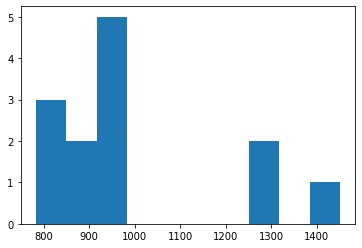

In [9]:
plt.hist(cleaned_salary)

In [22]:
pd.to_datetime(csvfiles['movements_03-2020']['Data lanc'])

0    2020-03-02
1    2020-03-02
2    2020-03-03
3    2020-03-03
4    2020-03-05
5    2020-03-06
6    2020-03-09
7    2020-03-09
8    2020-03-09
9    2020-03-12
10   2020-03-13
11   2020-03-13
12   2020-03-13
13   2020-03-16
14   2020-03-17
15   2020-03-20
16   2020-03-23
17   2020-03-23
18   2020-03-25
19   2020-03-31
20   2020-03-31
21   2020-03-31
Name: Data lanc, dtype: datetime64[ns]

In [27]:
for key in csvfiles.keys():
    pd.to_datetime(csvfiles[key]['Data lanc'])

KeyError: 'Data lanc'